# Actividad_4.2_Deteccion_de_senales_de_transito
## Navegación autónoma (Gpo 10)
## Alumnos:
A01794882 - Francisco Marmolejo Martinez

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array

2024-06-23 00:41:22.428662: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Configura el generador de imágenes para el conjunto de entrenamiento
image_size = (29, 30)  
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Fraction of images to reserve for validation
)

In [3]:
# Configura el generador de imágenes para el conjunto de validación (sin aumentación)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Configura el generador de imágenes para el conjunto de prueba (sin aumentación)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    'image_bank',
    target_size=image_size,# este es el tamano de las imagenes que tenemos de data. 29*30
    batch_size=32,
    class_mode='categorical'  # Usar 'categorical' para clasificación categotica
)

# Carga las imágenes del conjunto de prueba
test_generator = test_datagen.flow_from_directory(
    'image_bank',
    target_size=image_size,# este es el tamano de las imagenes que tenemos de data. 64*128
    batch_size=32,
    class_mode='categorical'
)

# Carga las imágenes del conjunto de validación
validation_generator = validation_datagen.flow_from_directory(
    'image_bank',
    target_size=image_size,# este es el tamano de las imagenes que tenemos de data. 29*30
    batch_size=32,
    class_mode='categorical'
)

Found 0 images belonging to 0 classes.


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [5]:
# Define el modelo
num_classes = len(train_generator.class_indices)  # Number of classes julian
model = Sequential([
    # Conv2D capa convolucional
    # 32, 64, 128 son el numero de filtros en la convolucion, detectando caracteristicas de la imagen.
    # MaxPooling es la capa de agrupacion Maxima, esto recude las dimensiones espaciales de la imagen(alto y ancho) en un factor de 2
    # Input_Shape es la entrada de la imagen 63x128 pixeles a 3 colores RGB.
    # (3,3) es el tamano del filtro en este caso de 3x3 pixeles.
    Conv2D(32, (3, 3), activation='relu', input_shape=(29, 30, 3)), #julian
    MaxPooling2D((2, 2)),#julian
    Conv2D(64, (3, 3), activation='relu'), #Daniel
    MaxPooling2D((2, 2)), #Daniel
    Conv2D(128, (3, 3), activation='relu'),#Andres
    MaxPooling2D((2, 2)),#Andres
    # Flatten, conviere la salida tridimensional de la ultima capa de MaxPooling en un vector unidimensional preparando los datos para las capas densas.
    Flatten(),
    # Capa 1 densa 512 neuronas con activacion ReLU.
    Dense(870, activation='relu'),#Francisco
    # Ultima capa 43 neuronas con activacion softmax para detectar clasificacion Categorica.
    Dense(1)  # Usar 'softmax' para clasificación Categorica #Francisco
])

/home/mitnik/.local/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-06-23 00:41:23.452360: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-23 00:41:23.476416: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skippi

In [6]:
# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 870)            │       223,590 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           871 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 317,709 (1.21 MB)

 Trainable params: 317,709 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

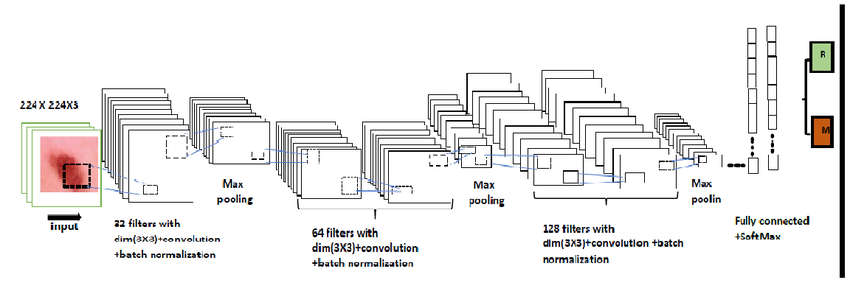

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose = 1,
)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
print('Test accuracy:', test_acc)

1225/1225 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9079 - loss: 0.2576
Test accuracy: 0.9052550792694092


In [ ]:
print(history.history)

{'accuracy': [0.29734283685684204, 0.40625, 0.5289328098297119, 0.71875, 0.6242948770523071, 0.78125, 0.683002769947052, 0.78125, 0.7213671207427979, 0.90625, 0.748500406742096, 0.71875, 0.7691247463226318, 0.75, 0.7859458327293396, 0.78125, 0.8008525371551514, 0.9375, 0.8126707077026367, 0.875], 'loss': [2.358201026916504, 0.8165686130523682, 1.4141253232955933, 0.6247860789299011, 1.094899296760559, 0.3518247604370117, 0.9174147844314575, 0.38983774185180664, 0.7995161414146423, 0.19181472063064575, 0.7244099378585815, 0.28259986639022827, 0.6629364490509033, 0.392923504114151, 0.6166111826896667, 0.2595391273498535, 0.5701847076416016, 0.165201336145401, 0.541003406047821, 0.15059617161750793], 'val_accuracy': [0.5465561151504517, 0.4444444477558136, 0.6951020359992981, 0.4444444477558136, 0.7463775277137756, 0.5555555820465088, 0.8318622708320618, 0.8888888955116272, 0.8454336524009705, 1.0, 0.8704847097396851, 0.8888888955116272, 0.8764795660972595, 1.0, 0.884591817855835, 0.88888

Text(0.5, 0, 'epoch')

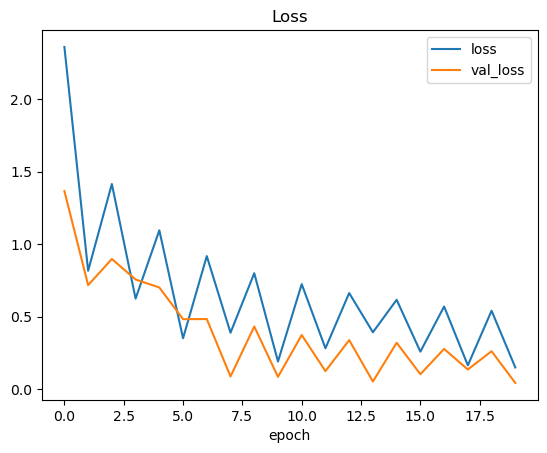

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

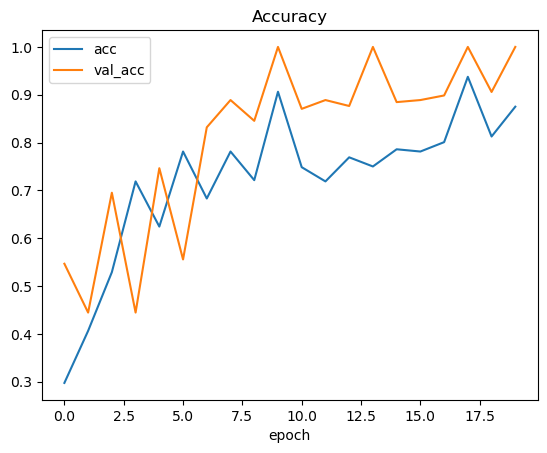

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
# Cargar la imagen
img_path_back = 'data/test/00002.png'
img_back = load_img(img_path_back, target_size=(28, 30))  # Asegúrate de que el tamaño coincida con el de entrenamiento
img_array = img_to_array(img_back)  # Convertir la imagen a un array numpy
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch (1, 64, 128, 3)
# Normalizar la imagen (rescalar)
img_array /= 255.0

In [ ]:
prediction = np.argmax(model.predict(img_array), axis=-1)

# Interpretar la salida según el tipo de problema
print('Prediccion:', prediction[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediccion: 32


In [ ]:
#model.save('model_detect_traffic_signs.h5')


In [ ]:
#keras.saving.save_model(model, 'model_detect_traffic_signs.keras')